In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datatable as dt

## [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

- ## Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

#### First of all we import the columns in which are interested from posts.csv and do a bit of preprocessing, removing NaN values and converting all remain values into integers.

In [2]:
prof_data = dt.fread('instagram_posts.csv', sep='\t', columns={"profile_id", "post_id", "numbr_likes", "number_comments"}).to_pandas()

In [3]:
prof_data = prof_data.dropna()
prof_data[['profile_id', 'numbr_likes', 'number_comments']] = prof_data[['profile_id', 'numbr_likes', 'number_comments']].values.astype('int64')
prof_data

,post_id,profile_id,numbr_likes,number_comments
0,BXdjjUlgcgq,2237947779,80,0
1,BVg0pbolYBC,5579335020,25,1
2,BRgkjcXFp3Q,313429634,9,0
3,BKTKeNhjEA7,1837592700,4,0
4,8-NQrvoYLX,1131527143,8,0
...,...,...,...,...
42710192,BcpWMWGBfxh,5556457201,74,0
42710193,Ba6LZWwlCl8,337186454,49,0
42710194,BPN0kM1hYUw,3289886053,18,0
42710195,BxsZ8nDBr-L,8536366360,27,1


#### Take post and profile id to compare each other and extract the posts belongs to each profile.

In [4]:
prof_post = prof_data[['post_id', 'profile_id']]
prof_post    

,post_id,profile_id
0,BXdjjUlgcgq,2237947779
1,BVg0pbolYBC,5579335020
2,BRgkjcXFp3Q,313429634
3,BKTKeNhjEA7,1837592700
4,8-NQrvoYLX,1131527143
...,...,...
42710192,BcpWMWGBfxh,5556457201
42710193,Ba6LZWwlCl8,337186454
42710194,BPN0kM1hYUw,3289886053
42710195,BxsZ8nDBr-L,8536366360


#### This is the function, given a profile_id from prof_post, returns all posts belongs to that profile_id given in input taking from the dataset above.

In [5]:
def from_prof_to_posts(id_prof):
    return prof_post[prof_post['profile_id'] == id_prof][['profile_id','post_id']]

#### An example with the first profile_id in the dataset we have selected.

In [6]:
from_prof_to_posts(prof_post['profile_id'].loc[0])

,profile_id,post_id
0,2237947779,BXdjjUlgcgq
773482,2237947779,BeyPed5hKj9
2868573,2237947779,Bunhd1DFVAG
2868706,2237947779,Bppi85gliQK
3730200,2237947779,BuDfIyslzfw
29715661,2237947779,BxJsMDpA2yH
29715667,2237947779,Bt5LFpZlm3z
29715668,2237947779,BxZIzaQhS-o
29715669,2237947779,BxRZvS0gPIA
29715769,2237947779,BwygkNCAShv


- ## Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.


#### Now we take data from profiles.csv and we are looking for only profiles which are in the previous dataset extracted.

In [7]:
prof_data1 = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_id", "n_posts"}).to_pandas().dropna()
prof_data1['profile_id'] = prof_data1['profile_id'].astype('int64')
prof_data1   

,profile_id,n_posts
0,4721049632,170.0
1,590583002,2878.0
2,1074146658,431.0
5,145064167,590.0
6,2061867521,753.0
...,...,...
4509578,4038738066,576.0
4509579,184061156,193.0
4509580,4070370466,30.0
4509581,1418322351,497.0


In [8]:
prof_data1 = prof_data1[prof_data1['profile_id'].isin(prof_post['profile_id'])] 
prof_data1

,profile_id,n_posts
0,4721049632,170.0
1,590583002,2878.0
2,1074146658,431.0
5,145064167,590.0
6,2061867521,753.0
...,...,...
4509578,4038738066,576.0
4509579,184061156,193.0
4509580,4070370466,30.0
4509581,1418322351,497.0


#### This is the function, given an integer n, returns the posts that belong to the n top posted profiles.
#### I mean the top n profiles that have posted the highest number of posts.

In [9]:
def post_of_n_posted_prof(n):
    n_top_prof = prof_data1.sort_values("n_posts", ascending=False).head(n)
    top_posts = [from_prof_to_posts(row.profile_id) for row in n_top_prof.itertuples()]
    n_top_posts = pd.concat(top_posts)
    return n_top_posts

#### An example  with n is equal to 2.

In [10]:
post_of_n_posted_prof(2)

,profile_id,post_id
9592952,199664772,Bq3hP3Khp8J
9592953,199664772,Bq3hN53hUsD
9592954,199664772,BCqCe9LypeF
9592955,199664772,20Wu4zypd2
9592956,199664772,BrKq76AhadU
9592957,199664772,Bq_MjFzB_Wt
9592958,199664772,Bq_MiKhhP05
9592959,199664772,BpQ2cmKF-W0
9592960,199664772,3V4OeXypTT
9592961,199664772,BzUmjr2pgni


- ## What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

#### We take the 10 posted profiles from profiles.csv.

In [11]:
top_profiles = prof_data1.sort_values("n_posts", ascending=False).head(10)
top_profiles

,profile_id,n_posts
3990313,199664772,183730.0
2571453,8563366588,142428.0
4338921,1273455368,126340.0
3942129,9813508,125220.0
4219642,1607309412,117262.0
2207897,1087613619,117099.0
4313908,1603889832,113780.0
4219476,218172998,113182.0
4236057,285549744,112777.0
4219551,1701679225,112260.0


#### At this point we can merge this 10 top profiles with the first dataset which is imported to calculate average number of likes and comments for these profiles.

In [12]:
ten_prof_post = prof_data.merge(top_profiles, on="profile_id")
ten_prof_post[['profile_id', 'numbr_likes', 'number_comments', 'n_posts']] = ten_prof_post[['profile_id', 'numbr_likes', 'number_comments', 'n_posts']].astype('int64')
ten_prof_post

,post_id,profile_id,numbr_likes,number_comments,n_posts
0,BxthV3ShVom,1701679225,0,0,112260
1,ByAFy4jhV31,1701679225,4,0,112260
2,BxtZ9NQhF5Q,1701679225,2,0,112260
3,Bxmcoaxh-2v,1701679225,0,0,112260
4,ByPOff-Bgrt,1701679225,1,0,112260
...,...,...,...,...,...
427,BxJp6dVJvtO,8563366588,0,0,142428
428,BxJposzpeA7,8563366588,0,0,142428
429,BxJpmohpwK2,8563366588,0,0,142428
430,BxJpkrrJ0b3,8563366588,0,0,142428


In [13]:
ten_prof_post = ten_prof_post.sort_values("n_posts", ascending=False)
ten_prof_post

,post_id,profile_id,numbr_likes,number_comments,n_posts
309,BCqCe9LypeF,199664772,27,0,183730
317,BzUmictJSO1,199664772,6,0,183730
325,BzScUjhJiwK,199664772,17,0,183730
324,BzUmcZRpTTn,199664772,3,0,183730
323,BzUmdnupYxW,199664772,3,0,183730
...,...,...,...,...,...
41,ByAd5B5BdDP,1701679225,2,0,112260
42,BxzqYeRB8Re,1701679225,6,0,112260
43,ByKAGjThGMv,1701679225,1,0,112260
44,Bvk-3r5hFxJ,1701679225,0,0,112260


#### We  use .groupby  and .mean commands on profile_id to receive in output a DataFrame with average values of likes and comments!  

In [14]:
print(f" This is the DataFrame containing the average values of likes and comments of the ten profiles with the most posts: ")
avg_data = ten_prof_post.groupby('profile_id').mean().sort_values("n_posts", ascending=False)
avg_data[['numbr_likes', 'number_comments']] = round(avg_data[['numbr_likes', 'number_comments']], 3)
avg_data

 This is the DataFrame containing the average values of likes and comments of the ten profiles with the most posts: 


,numbr_likes,number_comments,n_posts
profile_id,,,
199664772,7.667,0.000,183730.0
8563366588,0.000,0.000,142428.0
1273455368,2.960,0.040,126340.0
9813508,0.296,0.000,125220.0
1607309412,1.541,0.000,117262.0
1087613619,2.026,0.184,117099.0
1603889832,6.478,0.045,113780.0
218172998,0.400,0.040,113182.0
285549744,3.922,0.000,112777.0


## Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

#### In this last request we want to search what posts have sent on Instagram by this top 10 profiles in the given intervals of RQ3, so we have to take 'cts' column from posts.csv and do a bit of preprocessing.

In [15]:
time_data = dt.fread('instagram_posts.csv', sep='\t', columns={'profile_id', 'post_id', 'cts'}).to_pandas().dropna()
time_data

,post_id,profile_id,cts
0,BXdjjUlgcgq,2.237948e+09,2017-08-06 20:06:57
1,BVg0pbolYBC,5.579335e+09,2017-06-19 09:31:16
2,BRgkjcXFp3Q,3.134296e+08,2017-03-11 20:05:03
3,BKTKeNhjEA7,1.837593e+09,2016-09-13 16:27:16
4,8-NQrvoYLX,1.131527e+09,2015-10-18 10:19:27
...,...,...,...
42710192,BcpWMWGBfxh,5.556457e+09,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,3.371865e+08,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3.289886e+09,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8.536366e+09,2019-05-20 20:07:52


In [16]:
time_data.profile_id = time_data.profile_id.astype('int64')
time_data

,post_id,profile_id,cts
0,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57
1,BVg0pbolYBC,5579335020,2017-06-19 09:31:16
2,BRgkjcXFp3Q,313429634,2017-03-11 20:05:03
3,BKTKeNhjEA7,1837592700,2016-09-13 16:27:16
4,8-NQrvoYLX,1131527143,2015-10-18 10:19:27
...,...,...,...
42710192,BcpWMWGBfxh,5556457201,2017-12-13 15:38:04
42710193,Ba6LZWwlCl8,337186454,2017-10-31 11:28:01
42710194,BPN0kM1hYUw,3289886053,2017-01-13 20:16:37
42710195,BxsZ8nDBr-L,8536366360,2019-05-20 20:07:52


#### Here we import functions used in RQ3 to normalise 'cts' column and to find out the number of posts for each of top 10 profile in the given intervals.

In [22]:
from posts import find_posts_between

#### We use post_of_n_posted_prof function with n=10 to have all posts belongs to these top 10 posted profiles.

In [23]:
total_post_of_ten = post_of_n_posted_prof(10)
total_post_of_ten

,profile_id,post_id
9592952,199664772,Bq3hP3Khp8J
9592953,199664772,Bq3hN53hUsD
9592954,199664772,BCqCe9LypeF
9592955,199664772,20Wu4zypd2
9592956,199664772,BrKq76AhadU
...,...,...
40437904,1701679225,BxT74jSH25K
40996459,1701679225,BxzVSO6hq2V
41291564,1701679225,BxrFpFzBquO
42357392,1701679225,BxwWhDXh9-v


#### We merge datasets to have all coloumns in which are interested from them.

#### It will be our final_data!

In [25]:
final_data = pd.merge(right = time_data, left = total_post_of_ten, on="post_id")
final_data = final_data.drop('profile_id_y', axis=1)

In [26]:
final_data = final_data.rename(columns={'profile_id_x':'profile_id'})
final_data

,profile_id,post_id,cts
0,199664772,Bq3hP3Khp8J,2018-12-02 03:03:33
1,199664772,Bq3hN53hUsD,2018-12-02 03:03:17
2,199664772,BCqCe9LypeF,2016-03-07 16:28:50
3,199664772,20Wu4zypd2,2015-05-18 11:21:27
4,199664772,BrKq76AhadU,2018-12-09 13:33:47
...,...,...,...
427,1701679225,BxT74jSH25K,2019-05-11 08:03:24
428,1701679225,BxzVSO6hq2V,2019-05-23 06:41:49
429,1701679225,BxrFpFzBquO,2019-05-20 07:51:12
430,1701679225,BxwWhDXh9-v,2019-05-22 08:54:51


#### Intervals of time given in RQ3.

In [28]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

#### We create the last DataFrame in which we have the number of posts of each profile for each given interval of time using find_posts_between function imported from posts.publishing and concatenating each smaller data refers to a single interval.

In [35]:
all_interval_posts = pd.DataFrame()   #an empty DataFrame

for id_prof in pd.unique(final_data['profile_id']):
    #searching for each profile considering them as uniques(check all rows of the same profile for all profiles)
    for start, end in intervals:
        n_posts = len(find_posts_between(final_data[final_data['profile_id'] == id_prof], start, end)) 
        #number of posts for that given profile in that interval 
        column_names = ['profile_id', 'n_posts', 'interval'] #labels
        data = [[id_prof, n_posts, f"{start} - {end}"]] #values of data extracted
        interval_posts = pd.DataFrame(data = data, columns = column_names) 
        # each "smaller" dataset(I mean for each interval)
        all_interval_posts = pd.concat([interval_posts, all_interval_posts])

all_interval_posts = all_interval_posts.sort_values(by="interval")
all_interval_posts #final DataFrame with intervals in order 

,profile_id,n_posts,interval
0,1701679225,0,00:00:00 - 02:59:59
0,199664772,2,00:00:00 - 02:59:59
0,1087613619,3,00:00:00 - 02:59:59
0,1603889832,1,00:00:00 - 02:59:59
0,8563366588,12,00:00:00 - 02:59:59
...,...,...,...
0,199664772,0,20:00:00 - 23:59:59
0,9813508,8,20:00:00 - 23:59:59
0,1607309412,0,20:00:00 - 23:59:59
0,1087613619,10,20:00:00 - 23:59:59


#### Finally plot all these data to visualize them in a best way  and extract some information from them.

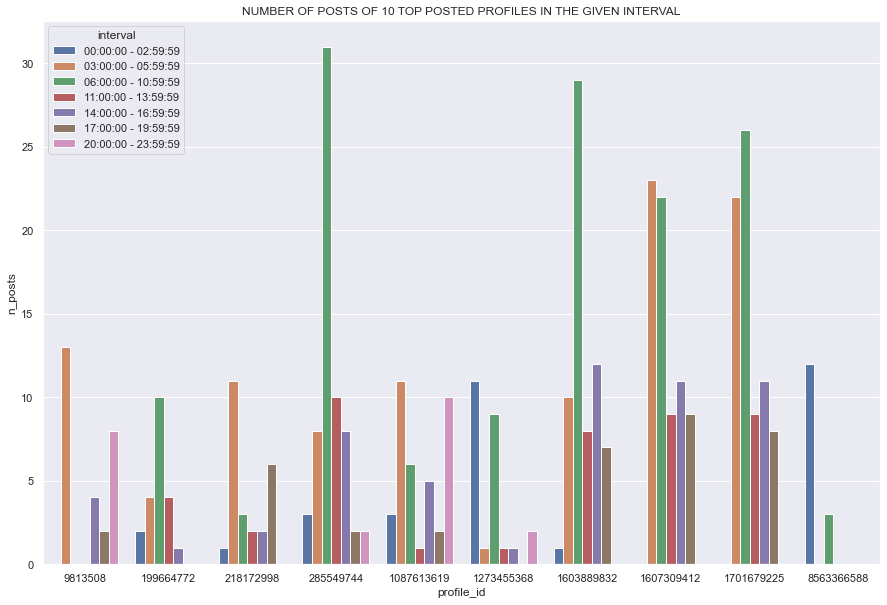

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="profile_id", y="n_posts", hue="interval", data = all_interval_posts, ci=None)
ax.set_title("NUMBER OF POSTS OF 10 TOP POSTED PROFILES IN THE GIVEN INTERVAL")
plt.show()

###### This graph represents the number of posts of the ten profiles with the most posts for each given time interval in the legend at the left corner.

###### As we can see each differently colored bar grouped for each profile represente the posts in that interval.

###### It can be seen that although these are the profiles that made the most posts, the number of posts for each profile during each individual interval and in total during the day is not that high, in fact they are very low values compared to the total number of posts recorded in the dataset.

###### This is due to the fact that in the imported dataset there are not all the posts of each individual profile.

###### In addition, it can be seen that actually, in this dataset, the profile that posted the most ('199664772') is associated with fewer posts than other users, which contradicts the fact that instead it is the user with the most posts. hile the profile with the least number of posts ('1701679225') among the ten profile with the most posts are associated with a high number of posts compared to others.

###### Therefore, although it is a fairly explanatory graph that gives us an idea of how many posts are made in a single day and divided by time intervals, we would have to analyze the entire dataset to get real useful informations.